In [2]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

#DATA_PATH = '/content/drive/MyDrive/8th/Thesis/EmotionDataset.json.json'
#DATA_PATH = '/content/drive/MyDrive/Thesis/Emotion Music/data_10.json'
DATA_PATH = '/content/drive/MyDrive/Thesis/Emotion Music/data_new_10.json'

Mounted at /content/drive


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 130, 64)           19968     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
Total params: 57,412
Trainable params: 57,412
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
33/33 [==============================]

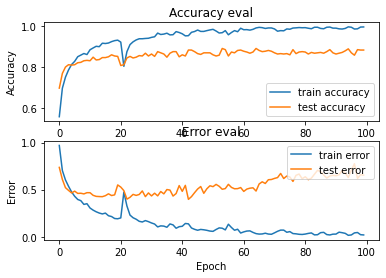

10/10 - 0s - loss: 0.6291 - accuracy: 0.8824 - 377ms/epoch - 38ms/step

Test accuracy: 0.8823529481887817


In [4]:
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets 
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates RNN-LSTM model

    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """
    
    # build network topology
    model = keras.Sequential()
    
    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))    
    model.add(keras.layers.LSTM(64, dropout = 0.4, recurrent_dropout = 0.4))

    # dense layer
    model.add(keras.layers.Dense(64, activation='tanh'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(4, activation='softmax'))

    return model


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.10, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
    model = build_model(input_shape)

    # compile model
    #optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    #optimiser = keras.optimizers.SGD(momentum=0.01, nesterov=True)
    #optimiser = keras.optimizers.Nadam(learning_rate=0.001)
    optimiser = keras.optimizers.Adam(amsgrad=True)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=64, epochs=100)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                15168     
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 15,684
Trainable params: 15,556
Non-trainable params: 128
_________________________________________________________________
None
Epoch 1/100
26/26 [==============================] - 4s 28ms/step - loss: 1.0735 - accuracy: 0.5317 - val_loss: 0.9361 - val_accuracy: 0.5373
Epoch 2/100
26/26 [==============================] - 0s 11ms/step - loss: 0.7641 - accuracy: 0.6791

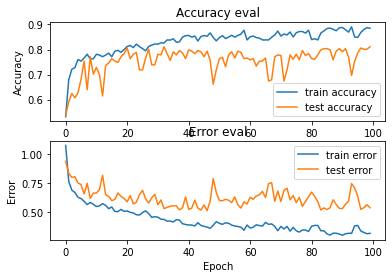

7/7 - 0s - loss: 0.5278 - accuracy: 0.7589 - 375ms/epoch - 54ms/step

Test accuracy: 0.7589285969734192


In [ ]:
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets 
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test



if __name__ == "__main__":
  # get train, validation, test splits
  X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.10, 0.2)
  model = keras.Sequential()
  model.add(keras.layers.GRU(64, input_shape=(130, 13)))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Dense(4))
  print(model.summary())

  model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
  )	

  history = model.fit(
    X_train, y_train, validation_data=(X_validation, y_validation), batch_size=64, epochs=100
  )
  # plot accuracy/error for training and validation
  plot_history(history)

  # evaluate model on test set
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
  print('\nTest accuracy:', test_acc)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


23/23 [==============================] - 4s 50ms/step - loss: 1.4170 - accuracy: 0.3485 - val_loss: 0.9718 - val_accuracy: 0.6006
Epoch 2/100
23/23 [==============================] - 0s 14ms/step - loss: 0.9930 - accuracy: 0.5598 - val_loss: 0.8329 - val_accuracy: 0.6425
Epoch 3/100
23/23 [==============================] - 0s 15ms/step - loss: 0.8625 - accuracy: 0.5948 - val_loss: 0.7630 - val_accuracy: 0.6760
Epoch 4/100
23/23 [==============================] - 0s 14ms/step - loss: 0.7764 - accuracy: 0.6501 - val_loss: 0.7264 - val_accuracy: 0.7151
Epoch 5/100
23/23 [==============================] - 0s 14ms/step - loss: 0.7495 - accuracy: 0.6620 - val_loss: 0.7074 - val_accuracy: 0.7151
Epoch 6/100
23/23 [==============================] - 0s 14ms/step - loss: 0.6794 - accuracy: 0.7082 - val_loss: 0.6914 - val_accuracy: 0.7235
Epoch 7/100
23/23 [==============================] - 0s 14ms/step - loss: 0.6659 - accuracy: 0.7145 - val_loss: 0.6721 - val_accuracy: 0.7318
Epoch 8/100
23/23 

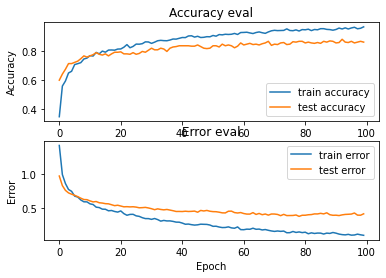

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              39936     
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 516       
                                                                 
Total params: 40,452
Trainable params: 40,452
Non-trainable params: 0
_________________________________________________________________
None
14/14 - 0s - loss: 0.4815 - accuracy: 0.8322 - 100ms/epoch - 7ms/step

Test accuracy: 0.8322147727012634


In [ ]:
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets 
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


if __name__ == "__main__":
  # get train, validation, test splits
  X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.2, 0.2)
  
  model = keras.Sequential() 
  model.add(keras.layers.Bidirectional(keras.layers.LSTM(64,input_shape=(130, 13))))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(4, activation='sigmoid'))
  
  model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      optimizer='adam',
      metrics=['accuracy']) 
  
  history = model.fit(
    X_train, y_train, validation_data=(X_validation, y_validation), batch_size=64, epochs=100
  )

  # plot accuracy/error for training and validation
  plot_history(history)
  print(model.summary())
  # evaluate model on test set
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
  print('\nTest accuracy:', test_acc)
  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 6, 32)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 6, 32)        128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 2, 32)        0 

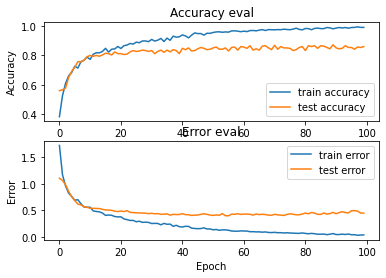

18/18 - 0s - loss: 0.4638 - accuracy: 0.8336 - 53ms/epoch - 3ms/step

Test accuracy: 0.8336314558982849
Target: 2, Predicted label: [2]


In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

#DATA_PATH = '/content/drive/MyDrive/8th/Thesis/EmotionDataset.json.json'
DATA_PATH = '/content/drive/MyDrive/Thesis/Emotion Music/data_10.json'

def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates CNN model

    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(4, activation='softmax'))

    return model


def predict(model, X, y):
    """Predict a single sample using the trained model

    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=100)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[100]
    y_to_predict = y_test[100]

    # predict sample
    predict(model, X_to_predict, y_to_predict)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 130, 128)          5120      
                                                                 
 conv1d_3 (Conv1D)           (None, 130, 128)          49280     
                                                                 
 bidirectional_2 (Bidirectio  (None, 130, 128)         74496     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 130, 128)         74496     
 nal)                                                            
                                                                 
 attention_1 (attention)     (None, 128)               258       
                                                                 
 dense_1 (Dense)             (None, 4)                

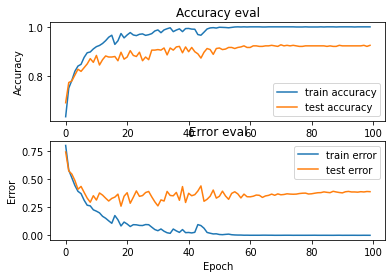

10/10 [==============================] - 2s 12ms/step


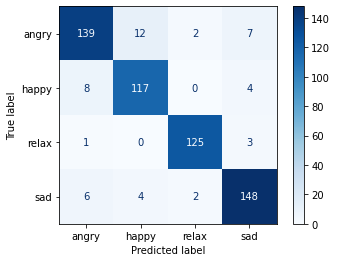

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       160
           1       0.88      0.91      0.89       129
           2       0.97      0.97      0.97       129
           3       0.91      0.93      0.92       160

    accuracy                           0.92       578
   macro avg       0.92      0.92      0.92       578
weighted avg       0.92      0.92      0.92       578



In [5]:
from pandas import read_csv
import numpy as np
from keras import Model
from keras.layers import Layer
import keras.backend as K
from keras.layers import Input, Dense, LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from keras.utils.vis_utils import plot_model
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)

    def call(self,x):        
        e = K.tanh(K.dot(x,self.W)+self.b)       
        e = K.squeeze(e, axis=-1)       
        alpha = K.softmax(e)        
        alpha = K.expand_dims(alpha, axis=-1)        
        context = x * alpha
        context = K.sum(context, axis=1)
        return context
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets 
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


if __name__ == "__main__":
  # get train, validation, test splits
  X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.2, 0.2)
  
  model = keras.Sequential() 
  model.add(keras.layers.Conv1D(128, kernel_size=3, padding="same", activation="tanh",input_shape=(130, 13)))
  model.add(keras.layers.Conv1D(128, kernel_size=3, padding="same", activation="tanh"))
  model.add(keras.layers.Bidirectional(keras.layers.GRU(64, activation="tanh", return_sequences=True, dropout = 0.3)))
  model.add(keras.layers.Bidirectional(keras.layers.GRU(64, activation="tanh", return_sequences=True, dropout = 0.3)))
  model.add(attention())
  model.add(keras.layers.Dense(4, trainable=True, activation='softmax'))
  opt = keras.optimizers.Adam(amsgrad=True)
  model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      optimizer=opt,
      metrics=['accuracy']) 
  
  model.summary()

  plot_model(model,to_file='/content/drive/MyDrive/model/attention.png', show_shapes=True, show_layer_activations=True)

  history = model.fit(
    X_train, y_train, validation_data=(X_validation, y_validation), batch_size=64, epochs=100
  )
  
  # plot accuracy/error for training and validation
  plot_history(history)
  
  # evaluate model on test set
  #test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
  #print('\nTest accuracy:', test_acc)
  
  y_pred1 = model.predict(X_test, batch_size=64, verbose=1)
  y_pred = np.argmax(y_pred1, axis=1)

  # Print f1, precision, and recall scores
  #print(precision_score(y_test, y_pred , average="macro"))
  #print(recall_score(y_test, y_pred , average="macro"))
  #print(f1_score(y_test, y_pred , average="macro"))
  
  labels = ["angry", "happy", "relax", "sad"] 
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap=plt.cm.Blues)
  plt.show()
  print(classification_report(y_test, y_pred))
  

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_73 (LSTM)              (None, 130, 64)           19968     
                                                                 
 attention_36 (attention)    (None, 64)                194       
                                                                 
 dense_35 (Dense)            (None, 4)                 260       
                                                                 
Total params: 20,422
Trainable params: 20,422
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
29/29 [==============================] - 2s 30ms/step - loss: 1.0641 - accuracy: 0.6093 - val_loss: 0.9013 - val_accuracy: 0.7143
Epoch 2/100
29/29 [==============================] - 0s 11ms/step - loss: 0.8604 - accuracy: 0.6953 - val_loss: 0.8242 - val_accuracy: 0.7273
Epoch 3/100
29/29 [==========

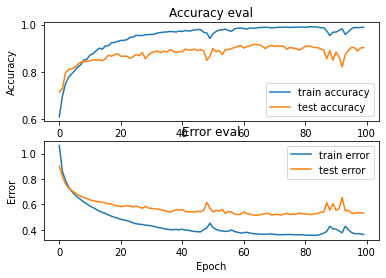

19/19 - 0s - loss: 0.5566 - accuracy: 0.8858 - 91ms/epoch - 5ms/step

Test accuracy: 0.8858131766319275


In [ ]:
from pandas import read_csv
import numpy as np
from keras import Model
from keras.layers import Layer
import keras.backend as K
from keras.layers import Input, Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.metrics import mean_squared_error

# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)

    def call(self,x):        
        e = K.tanh(K.dot(x,self.W)+self.b)       
        e = K.squeeze(e, axis=-1)       
        alpha = K.softmax(e)        
        alpha = K.expand_dims(alpha, axis=-1)        
        context = x * alpha
        context = K.sum(context, axis=1)
        return context
def create_LSTM_with_attention(hidden_units, dense_units, input_shape, activation):
    model = keras.Sequential() 
    model.add(Input(shape=input_shape))
    model.add(LSTM(hidden_units, return_sequences=True, activation=activation))
    model.add(attention())
    model.add(Dense(dense_units, trainable=True, activation=activation))    
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      optimizer='adam',
      metrics=['accuracy'])    
    return model    

model_attention = create_LSTM_with_attention(hidden_units=64, dense_units=4, 
                                  input_shape=(130,13), activation='tanh')
model_attention.summary()

history = model_attention.fit(
    X_train, y_train, validation_data=(X_validation, y_validation), batch_size=64, epochs=100
  )

# plot accuracy/error for training and validation
plot_history(history)
# evaluate model on test set
test_loss, test_acc = model_attention.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 130, 64)           15168     
                                                                 
 attention_2 (attention)     (None, 64)                194       
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 15,622
Trainable params: 15,622
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
29/29 [==============================] - 5s 48ms/step - loss: 1.2397 - accuracy: 0.4654 - val_loss: 1.0531 - val_accuracy: 0.6169
Epoch 2/100
29/29 [==============================] - 1s 18ms/step - loss: 0.9456 - accuracy: 0.6596 - val_loss: 0.8824 - val_accuracy: 0.6753
Epoch 3/100
29/29 [===========

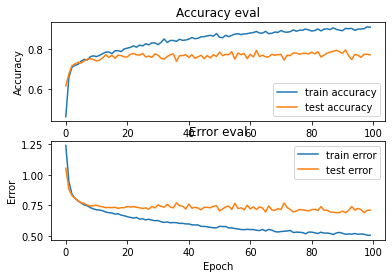

19/19 - 0s - loss: 0.6680 - accuracy: 0.7976 - 84ms/epoch - 4ms/step

Test accuracy: 0.7975778579711914


In [ ]:
from pandas import read_csv
import numpy as np
from keras import Model
from keras.layers import Layer
import keras.backend as K
from keras.layers import Input, Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.metrics import mean_squared_error
from keras.utils.vis_utils import plot_model

# Add attention layer to the deep learning network
class attention(Layer):
    
    def __init__(self,**kwargs):
       super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)

    def call(self,x):        
        e = K.tanh(K.dot(x,self.W)+self.b)       
        e = K.squeeze(e, axis=-1)       
        alpha = K.softmax(e)        
        alpha = K.expand_dims(alpha, axis=-1)        
        context = x * alpha
        context = K.sum(context, axis=1)
        return context


if __name__ == "__main__":
  
  model = keras.Sequential() 
  model.add(Input(shape=[130,13]))
  model.add(keras.layers.GRU(64, activation="tanh",  return_sequences=True, dropout = 0.3))
  model.add(attention())
  model.add(keras.layers.Dense(4, trainable=True, activation='tanh'))
  #model.add(keras.layers.Dense(4, activation='softmax'))
  
  model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      optimizer='adam',
      metrics=['accuracy']) 
  
  model.summary()

 

  history = model.fit(
    X_train, y_train, validation_data=(X_validation, y_validation), batch_size=64, epochs=100
  )

  # plot accuracy/error for training and validation
  plot_history(history)
  
  # evaluate model on test set
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
  print('\nTest accuracy:', test_acc)
  

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 130, 128)         30336     
 l)                                                              
                                                                 
 attention (attention)       (None, 128)               258       
                                                                 
 dense_6 (Dense)             (None, 4)                 516       
                                                                 
Total params: 31,110
Trainable params: 31,110
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
33/33 [==============================] - 10s 173ms/step - loss: 1.0311 - accuracy: 0.5657 - val_loss: 0.9382 - val_accuracy: 0.5981
Epoch 2/100
33/33 [==============================] - 5s 147ms/step - loss: 0.8543 - accuracy: 0.6854 - v

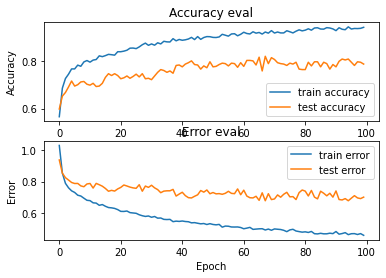

10/10 - 0s - loss: 0.7350 - accuracy: 0.7820 - 225ms/epoch - 22ms/step

Test accuracy: 0.7820069193840027


In [ ]:
from pandas import read_csv
import numpy as np
from keras import Model
from keras.layers import Layer
import keras.backend as K
from keras.layers import Input, Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.metrics import mean_squared_error
from keras.utils.vis_utils import plot_model

# Add attention layer to the deep learning network
class attention(Layer):
    
    def __init__(self,**kwargs):
       super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)

    def call(self,x):        
        e = K.tanh(K.dot(x,self.W)+self.b)       
        e = K.squeeze(e, axis=-1)       
        alpha = K.softmax(e)        
        alpha = K.expand_dims(alpha, axis=-1)        
        context = x * alpha
        context = K.sum(context, axis=1)
        return context


if __name__ == "__main__":
  
  model = keras.Sequential() 
  model.add(Input(shape=[130,13]))
  model.add(keras.layers.Bidirectional(keras.layers.GRU(64, activation="tanh",  return_sequences=True, dropout = 0.3)))
  model.add(attention())
  model.add(keras.layers.Dense(4, trainable=True, activation='tanh'))
  #model.add(keras.layers.Dense(4, activation='softmax'))
  
  model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      optimizer='adam',
      metrics=['accuracy']) 
  
  model.summary()

 

  history = model.fit(
    X_train, y_train, validation_data=(X_validation, y_validation), batch_size=64, epochs=100
  )

  # plot accuracy/error for training and validation
  plot_history(history)
  
  # evaluate model on test set
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
  print('\nTest accuracy:', test_acc)
  

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 130, 64)           19968     
                                                                 
 lstm_7 (LSTM)               (None, 130, 64)           33024     
                                                                 
 attention_2 (attention)     (None, 130, 64)           194       
                                                                 
 conv1d_2 (Conv1D)           (None, 130, 64)           12352     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                      

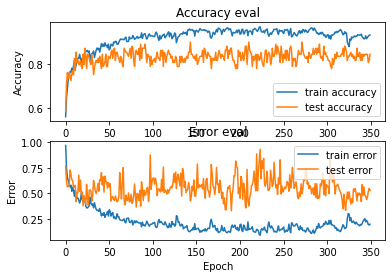

23/23 - 0s - loss: 0.4564 - accuracy: 0.8657 - 390ms/epoch - 17ms/step

Test accuracy: 0.8656509518623352


In [ ]:
from pandas import read_csv
import numpy as np
from keras import Model
import tensorflow.keras as keras
from keras.layers import Layer
import keras.backend as K
from keras.layers import Input, Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.metrics import mean_squared_error
from keras.utils.vis_utils import plot_model

class attention(Layer):
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(attention,self).__init__()

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)

    def call(self,x):        
        e = K.tanh(K.dot(x,self.W)+self.b)       
        e = K.squeeze(e, axis=-1)       
        alpha = K.softmax(e)        
        alpha = K.expand_dims(alpha, axis=-1)        
        context = x * alpha
        if self.return_sequences:
            return context
        context = K.sum(context, axis=1)
        return context

if __name__ == "__main__":
  
  model = keras.Sequential() 
  model.add(keras.layers.LSTM(64, return_sequences=True, activation="tanh",input_shape=(130,13)))
  model.add(keras.layers.LSTM(64, return_sequences=True, dropout = 0.3, activation="tanh"))
  model.add(attention(return_sequences=True))
  model.add(keras.layers.Conv1D(64, kernel_size=3, padding="same", activation="tanh"))
  model.add(keras.layers.GlobalMaxPooling1D())
  model.add(keras.layers.Dense(32, activation='tanh'))
  model.add(keras.layers.Dropout(0.3))  
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(4, activation='softmax'))
  # compile model
  opt = keras.optimizers.Adam(learning_rate=0.01)
  model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
  #model.compile(loss=keras.losses.sparse_categorical_crossentropy,
  #    optimizer='adam',
  #    metrics=['accuracy']) 
  
  model.summary()

  
  plot_model(model,to_file='/content/drive/MyDrive/model/attention_convolution_lstm.png', show_shapes=True, show_layer_activations=True)

  history = model.fit(
    X_train, y_train, validation_data=(X_validation, y_validation), batch_size=64, epochs=350
  )

  # plot accuracy/error for training and validation
  plot_history(history)
  
  # evaluate model on test set
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
  print('\nTest accuracy:', test_acc)
  

In [2]:
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets 
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 130, 64)           19968     
                                                                 
 bidirectional (Bidirectiona  (None, 130, 128)         66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 130, 128)         98816     
 nal)                                                            
                                                                 
 attention (attention)       (None, 130, 128)          258       
                                                                 
 conv1d (Conv1D)             (None, 130, 64)           24640     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0

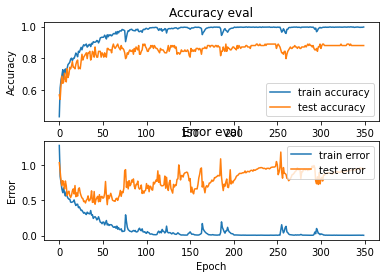

23/23 - 0s - loss: 0.8182 - accuracy: 0.8878 - 307ms/epoch - 13ms/step

Test accuracy: 0.8878116607666016


In [3]:
from pandas import read_csv
import numpy as np
from keras import Model
import tensorflow.keras as keras
from keras.layers import Layer
import keras.backend as K
from keras.layers import Input, Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.metrics import mean_squared_error
from keras.utils.vis_utils import plot_model

class attention(Layer):
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(attention,self).__init__()

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)

    def call(self,x):        
        e = K.tanh(K.dot(x,self.W)+self.b)       
        e = K.squeeze(e, axis=-1)       
        alpha = K.softmax(e)        
        alpha = K.expand_dims(alpha, axis=-1)        
        context = x * alpha
        if self.return_sequences:
            return context
        context = K.sum(context, axis=1)
        return context

if __name__ == "__main__":
  X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.05)

  model = keras.Sequential() 
  model.add(keras.layers.LSTM(64, return_sequences=True, activation="tanh",input_shape=(130,13)))
  model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True, activation="tanh")))
  model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True, dropout = 0.3, activation="tanh")))
  model.add(attention(return_sequences=True))
  model.add(keras.layers.Conv1D(64, kernel_size=3, padding="same", activation="tanh"))
  model.add(keras.layers.GlobalMaxPooling1D())
  model.add(keras.layers.Dense(32, activation='tanh'))
  model.add(keras.layers.Dropout(0.3))  
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(4, activation='softmax'))
  # compile model
  #opt = keras.optimizers.Adam(learning_rate=0.01)
  opt = keras.optimizers.Adam(amsgrad=True)
  model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
  #model.compile(loss=keras.losses.sparse_categorical_crossentropy,
  #    optimizer='adam',
  #    metrics=['accuracy']) 
  
  model.summary()
  
  plot_model(model,to_file='/content/drive/MyDrive/model/attention_convolution_bilstm.png', show_shapes=True, show_layer_activations=True)

  history = model.fit(
    X_train, y_train, validation_data=(X_validation, y_validation), batch_size=64, epochs=350
  )

  # plot accuracy/error for training and validation
  plot_history(history)
  
  # evaluate model on test set
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
  print('\nTest accuracy:', test_acc)
  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 130, 64)           19968     
                                                                 
 bidirectional (Bidirectiona  (None, 130, 128)         66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 130, 128)         98816     
 nal)                                                            
                                                                 
 attention (attention)       (None, 130, 128)          258       
                                                                 
 conv1d (Conv1D)             (None, 130, 64)           24640     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0

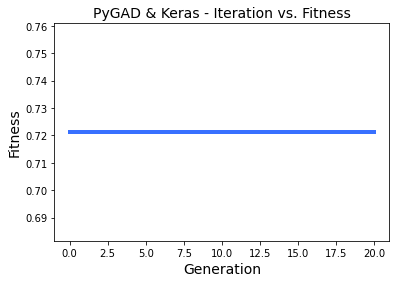

Fitness value of the best solution = 0.7212089656852706
Index of the best solution : 0
Predictions of the trained network : [[0.25077075 0.2505243  0.24935198 0.24935296]
 [0.25045884 0.25045598 0.24957144 0.24951376]
 [0.2504048  0.25043955 0.24988921 0.24926642]
 ...
 [0.25070783 0.25017253 0.24983995 0.2492797 ]
 [0.2504795  0.25077206 0.24951728 0.24923119]
 [0.2508809  0.25083724 0.24933457 0.24894728]]
Categorical Crossentropy :  1.3865607
Accuracy :  0.2334331


In [ ]:
from keras.losses import Loss
import pygad.kerasga
import numpy as np
import pygad
import math as m
from pandas import read_csv
import numpy as np
from keras import Model
import tensorflow.keras as keras
from keras.layers import Layer
import keras.backend as K
from keras.layers import Input, Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.metrics import mean_squared_error
from keras.utils.vis_utils import plot_model

class attention(Layer):
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(attention,self).__init__()

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)

    def call(self,x):        
        e = K.tanh(K.dot(x,self.W)+self.b)       
        e = K.squeeze(e, axis=-1)       
        alpha = K.softmax(e)        
        alpha = K.expand_dims(alpha, axis=-1)        
        context = x * alpha
        if self.return_sequences:
            return context
        context = K.sum(context, axis=1)
        return context

def fitness_func(solution, sol_idx):
    global X_train, y_train, keras_ga, model

    #predictions = pygad.kerasga.predict(model=model,
    #                                    solution=solution,
    #                                    data=X_train)
    best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model, weights_vector=solution)
    model.set_weights(best_solution_weights)
    predictions = model.predict(X_train)
    scce = tf.keras.losses.SparseCategoricalCrossentropy()
    loss = scce(y_train, predictions).numpy()
    #print("Loss: ",loss)    
    solution_fitness = 1.0 / ( loss + 0.00000001)    
    #print(solution_fitness)
    if(m.isnan(solution_fitness)):
      solution_fitness=0
    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

def load_data(data_path):   
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    fig, axs = plt.subplots(2)
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    plt.show()


def prepare_datasets(test_size, validation_size):
    X, y = load_data(DATA_PATH)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)    
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)
    return X_train, X_validation, X_test, y_train, y_validation, y_test

if __name__ == "__main__":
  X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.1, 0.1)
  model = keras.Sequential() 
  model.add(keras.layers.LSTM(64, return_sequences=True, activation="tanh",input_shape=(130,13)))
  model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True, activation="tanh")))
  model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True, dropout = 0.3, activation="tanh")))
  model.add(attention(return_sequences=True))
  model.add(keras.layers.Conv1D(64, kernel_size=3, padding="same", activation="tanh"))
  model.add(keras.layers.GlobalMaxPooling1D())
  model.add(keras.layers.Dense(32, activation='tanh'))
  model.add(keras.layers.Dropout(0.3))  
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(4, activation='softmax'))
  print(model.summary())
 
  keras_ga = pygad.kerasga.KerasGA(model=model, num_solutions=10)
  num_generations = 20 
  num_parents_mating = 2 
  initial_population = keras_ga.population_weights 

  ga_instance = pygad.GA(num_generations=num_generations, num_parents_mating=num_parents_mating,
                       initial_population=initial_population, fitness_func=fitness_func,
                       on_generation=callback_generation)

  ga_instance.run()
  ga_instance.plot_fitness(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

  solution, solution_fitness, solution_idx = ga_instance.best_solution()
  print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
  print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

  #predictions = pygad.kerasga.predict(model=model, solution=solution, data=X_train)   
  best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model, weights_vector=solution)
  model.set_weights(best_solution_weights)
  predictions = model.predict(X_train)
  print("Predictions of the trained network : {predictions}".format(predictions=predictions))

  scce = tf.keras.losses.SparseCategoricalCrossentropy()  
  print("Categorical Crossentropy : ", scce(y_train, predictions).numpy())

  ca = keras.metrics.SparseCategoricalAccuracy()
  ca.update_state(y_train, predictions)
  accuracy = ca.result().numpy()
  print("Accuracy : ", accuracy)


In [ ]:
y_true = [1, 2]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
# Using 'auto'/'sum_over_batch_size' reduction type.
scce = tf.keras.losses.SparseCategoricalCrossentropy()
scce(y_true, y_pred).numpy()

1.1769392

In [ ]:
pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.2 MB/s 
